In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

In [2]:
df = pd.read_csv(r"heart.csv")

In [3]:
gr = df.groupby("sex")

In [4]:
men = gr.get_group(1)

In [5]:
men

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [6]:
men = men.drop('sex', axis=1)
men

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,0,164,176,1,0,90,0,1.0,1,2,1,0
299,45,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,0,144,193,1,1,141,0,3.4,1,2,3,0


C:\Users\szaineb2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


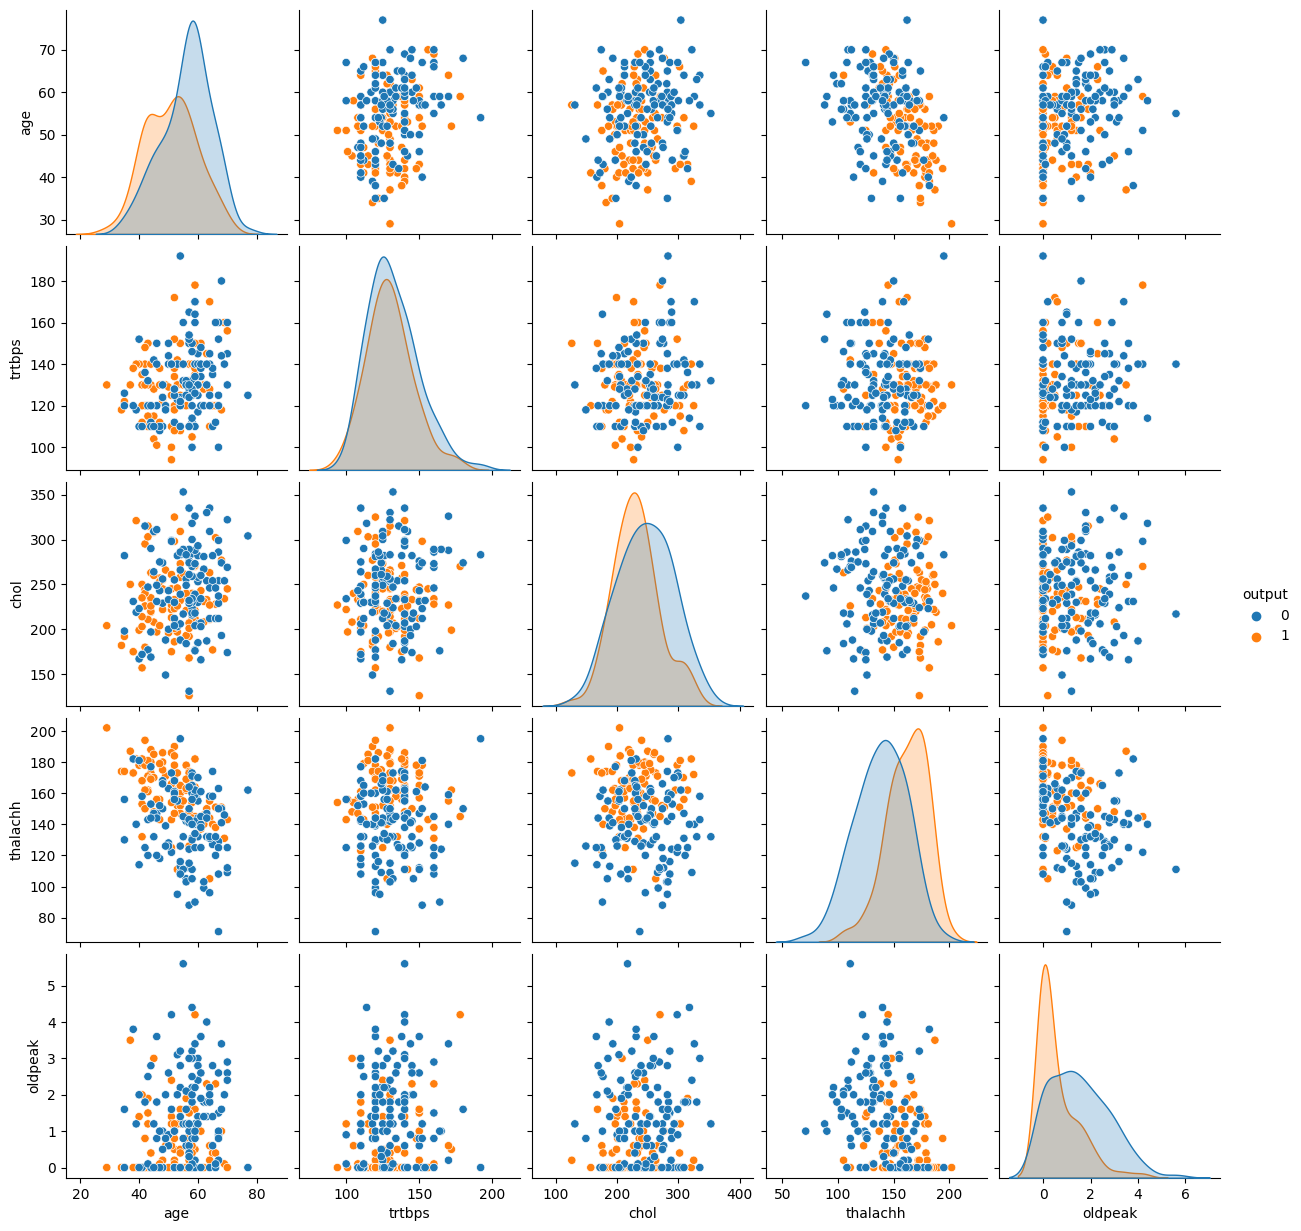

In [7]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]
men_numeric = men.loc[:, numeric_list]
sn.pairplot(men_numeric, hue = "output", diag_kind = "kde")
plt.show()

In [8]:
men.columns

Index(['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
men.columns = ['age', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thallium', 'output']

In [10]:
men.columns

Index(['age', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type',
       'num_major_vessels', 'thallium', 'output'],
      dtype='object')

In [11]:
men.head()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thallium,output
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,120,263,0,1,173,0,0.0,2,0,3,1


In [12]:
#changin mumeric encodings to string
men.loc[men['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
men.loc[men['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
men.loc[men['chest_pain_type'] == 2, 'chest_pain_type'] = 'atypical angina'
men.loc[men['chest_pain_type'] == 3, 'chest_pain_type'] = 'non-anginal pain'

men.loc[men['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'normal'
men.loc[men['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'ST-T wave abnormality'
men.loc[men['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'left ventricular hypertrophy'

#slope - st_slope_type
men.loc[men['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
men.loc[men['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
men.loc[men['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thallium
men.loc[men['thallium'] == 0, 'thallium'] = 'nothing'
men.loc[men['thallium'] == 1, 'thallium'] = 'fixed defect'
men.loc[men['thallium'] == 2, 'thallium'] = 'normal'
men.loc[men['thallium'] == 3, 'thallium'] = 'reversable defect'

In [13]:
men.head()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thallium,output
0,63,non-anginal pain,145,233,1,normal,150,0,2.3,downsloping,0,fixed defect,1
1,37,atypical angina,130,250,0,ST-T wave abnormality,187,0,3.5,downsloping,0,normal,1
3,56,typical angina,120,236,0,ST-T wave abnormality,178,0,0.8,upsloping,0,normal,1
5,57,asymptomatic,140,192,0,ST-T wave abnormality,148,0,0.4,flat,0,fixed defect,1
7,44,typical angina,120,263,0,ST-T wave abnormality,173,0,0.0,upsloping,0,reversable defect,1


In [14]:
men_data = pd.get_dummies(men, drop_first=False)
men_data.columns

Index(['age', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'num_major_vessels', 'output', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thallium_fixed defect', 'thallium_normal',
       'thallium_nothing', 'thallium_reversable defect'],
      dtype='object')

In [15]:
men_temp = men_data['thallium_fixed defect']
men_temp2 = men_data['rest_ecg_type_ST-T wave abnormality']
men_data = pd.get_dummies(men, drop_first=True)
men_data.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,output,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thallium_normal,thallium_nothing,thallium_reversable defect
0,63,145,233,1,150,0,2.3,0,1,False,True,False,False,True,False,False,False,False,False
1,37,130,250,0,187,0,3.5,0,1,True,False,False,False,False,False,False,True,False,False
3,56,120,236,0,178,0,0.8,0,1,False,False,True,False,False,False,True,True,False,False
5,57,140,192,0,148,0,0.4,0,1,False,False,False,False,False,True,False,False,False,False
7,44,120,263,0,173,0,0.0,0,1,False,False,True,False,False,False,True,False,False,True


In [16]:
frames = [men_data, men_temp, men_temp2]
men_result = pd.concat(frames,axis=1)
men_result.drop('rest_ecg_type_normal',axis=1,inplace=True)
men_result.drop('thallium_nothing',axis=1,inplace=True)
men_resultc = men_result.copy()

In [17]:
men_result.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,output,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,st_slope_type_flat,st_slope_type_upsloping,thallium_normal,thallium_reversable defect,thallium_fixed defect,rest_ecg_type_ST-T wave abnormality
0,63,145,233,1,150,0,2.3,0,1,False,True,False,False,False,False,False,False,True,False
1,37,130,250,0,187,0,3.5,0,1,True,False,False,False,False,False,True,False,False,True
3,56,120,236,0,178,0,0.8,0,1,False,False,True,False,False,True,True,False,False,True
5,57,140,192,0,148,0,0.4,0,1,False,False,False,False,True,False,False,False,True,True
7,44,120,263,0,173,0,0.0,0,1,False,False,True,False,False,True,False,True,False,True


<b>Train Test Split and Normalization</b>

In [18]:
X = men_result.drop('output', axis = 1)
Y = men_result['output']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(Y_train.shape))
print("y_test: {}".format(Y_test.shape))

X_train: (165, 18)
X_test: (42, 18)
y_train: (165,)
y_test: (42,)


In [20]:
X_train

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,st_slope_type_flat,st_slope_type_upsloping,thallium_normal,thallium_reversable defect,thallium_fixed defect,rest_ecg_type_ST-T wave abnormality
177,64,140,335,0,158,0,0.0,0,True,False,False,False,False,True,True,False,False,True
284,61,140,207,0,138,1,1.9,1,False,False,False,False,False,True,False,True,False,False
7,44,120,263,0,173,0,0.0,0,False,False,True,False,False,True,False,True,False,True
132,42,120,295,0,162,0,0.0,0,False,False,True,False,False,True,True,False,False,True
214,56,125,249,1,144,1,1.2,1,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,57,150,126,1,173,0,0.2,1,True,False,False,False,False,True,False,True,False,True
283,40,152,223,0,181,0,0.0,0,False,False,False,False,False,True,False,True,False,True
193,60,145,282,0,142,1,2.8,2,False,False,False,False,True,False,False,True,False,False
77,59,140,221,0,164,1,0.0,0,False,False,True,False,False,True,True,False,False,True


In [21]:
numeric_list = ["age", "resting_blood_pressure","cholesterol","max_heart_rate_achieved","st_depression","num_major_vessels"]

In [22]:
# XS_train = X_train
# XS_test = X_test
# standardScaler = StandardScaler()
# XS_train[numeric_list] = standardScaler.fit_transform(XS_train[numeric_list])
# XS_test[numeric_list] = standardScaler.fit_transform(XS_test[numeric_list])

In [23]:
minMaxScaler = MinMaxScaler()
X_train[numeric_list] = minMaxScaler.fit_transform(X_train[numeric_list])
X_test[numeric_list] = minMaxScaler.fit_transform(X_test[numeric_list])

<b>Random Forest</b>

In [24]:
# determine optimal number of trees
# n_estimators = [5,20,50,100, 500, 1000, 5000] # number of trees in the random forest


# random_grid = {'n_estimators': n_estimators}
# rf = RandomForestClassifier()
# from sklearn.model_selection import RandomizedSearchCV
# rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
#                n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [25]:
# rf_random.fit(X_train, Y_train)

In [26]:
# print ('Random grid: ', random_grid, '\n')
# # print the best parameters
# print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [27]:
# #Create classifier with training and testing
feature_names = [f"feature {i}" for i in range(X.shape[1])]
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

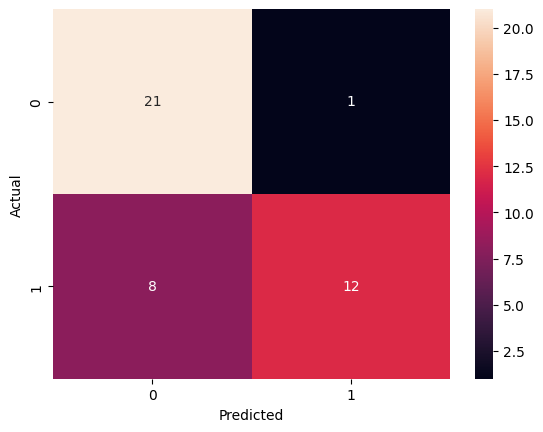

In [28]:
# plt.figure(figsize=(16, 6))
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')

In [29]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

importances = list(clf.feature_importances_)

# # Print out the feature and importances 
# print (importances)

Accuracy:  0.7857142857142857
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        22
           1       0.92      0.60      0.73        20

    accuracy                           0.79        42
   macro avg       0.82      0.78      0.78        42
weighted avg       0.82      0.79      0.78        42



In [30]:
# columns = X.columns
# i=0

# while i<len(columns):
#     print(f" The importance of feature '{columns[i]}' is {round(importances[i] * 100, 2)}%.")
#     i+=1

Elapsed time to compute the importances: 0.008 seconds


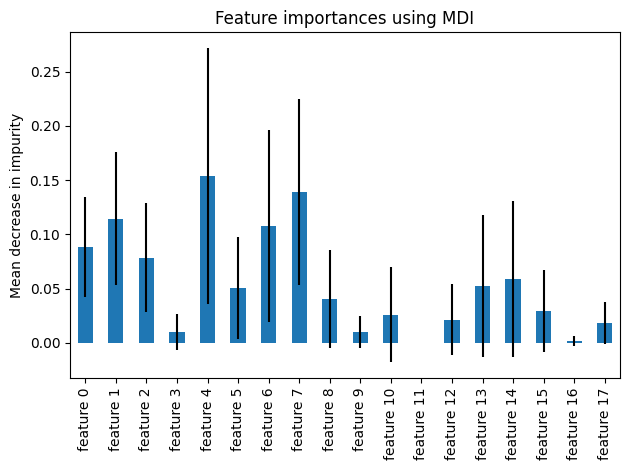

In [31]:
#important features
import time
import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

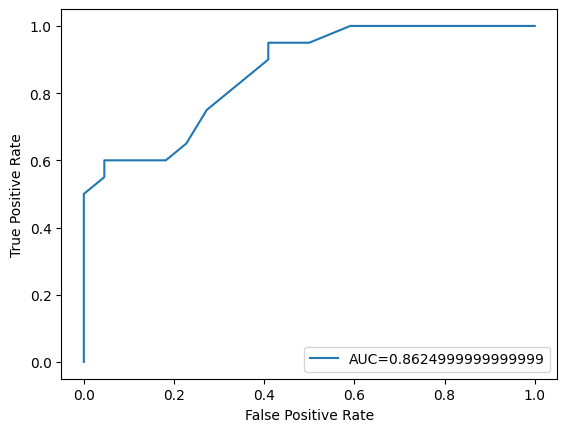

0.8624999999999999

In [32]:
#define metrics
Y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>K-Nearest Neighbor with training, testing and normalization</b>

In [33]:
#Determine classifier error rate
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=14)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)

In [ ]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')

In [ ]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

In [ ]:
#define metrics
Y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>Support Vector Machine using linear kernel, training/testing and normalization</b>

In [ ]:
#create a classifier
clf = svm.SVC(kernel="linear", C=0.1, gamma=10, probability=True)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

In [ ]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')

In [ ]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

In [ ]:
# #Non-linear algorithm for model
# nonlinear_clf = svm.SVC(kernel='rbf', gamma=0.01, C=10)
# nonlinear_clf.fit(X_train,Y_train)
# YN_pred=nonlinear_clf.predict(X_test)
# print(Y_pred)

In [ ]:
# confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
# sn.heatmap(confusion_matrix, annot=True, fmt='g')

In [ ]:
# print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
# plt.show()

# print(classification_report(Y_test, Y_pred))

In [ ]:
# from sklearn.model_selection import GridSearchCV
  
# # defining parameter range
# param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
#               'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear', 'rbf']} 
  
# grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train, Y_train)

In [ ]:
# # print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [ ]:
# grid_predictions = grid.predict(X_test)
# print('Accuracy: ',metrics.accuracy_score(Y_test, grid_predictions))
# plt.show() 
# # print classification report
# print(classification_report(Y_test, grid_predictions))

In [ ]:
#define metrics
Y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>Naive Bayes on training/testing and with normalization</b>

In [ ]:
#Create classifier
nv = GaussianNB()
#Fit data
nv.fit(X_train,Y_train) 

In [ ]:
Y_pred = nv.predict(X_test) # store the prediction data
accuracy_score(Y_test,Y_pred) # calculate the accuracy

# results = cross_val_score(nv, X, Y, cv=15)
# print('Cross-Validation Accuracy Scores', results)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, cmap="Blues")

print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

In [ ]:
#ROC Curve
Y_pred_proba = nv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>Logistic Regression with training/testing and normalization</b>

In [ ]:
# param_grid_lr = {
#     'max_iter': [50, 100, 200, 500, 1000]                               
# }
# logModel_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
# logModel_grid.fit(X_train, Y_train)
# print(logModel_grid.best_estimator_)

In [ ]:
#Create classifier
logistic_regression= LogisticRegression(max_iter=500)
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

In [ ]:
#Cross-validation with 5 folds
results = cross_val_score(logistic_regression, X_train, Y_train, cv=14)
print('Cross-Validation Accuracy Scores', results.mean())

In [ ]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, cmap='Greens')

In [ ]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

In [ ]:
#define metrics
Y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

In [ ]:
#Coefficients
log_odds = logistic_regression.coef_[0]

print(pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef']))

In [ ]:
#Calculating odds ratio
odds = np.exp(logistic_regression.coef_[0])

print(pd.DataFrame(odds, 
             X_train.columns, 
             columns=['odds coef']))

In [ ]:
print(logistic_regression.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logistic_regression.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

In [ ]:
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logistic_regression.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sn.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)